In [5]:
using NPZ, DSP, Plots, FFTW
using LsqFit

In [20]:
ol = npzread("../data/sims/ol_atm_1_vib_3.npy");
pgram = welch_pgram(ol[:,2]; fs=1000);

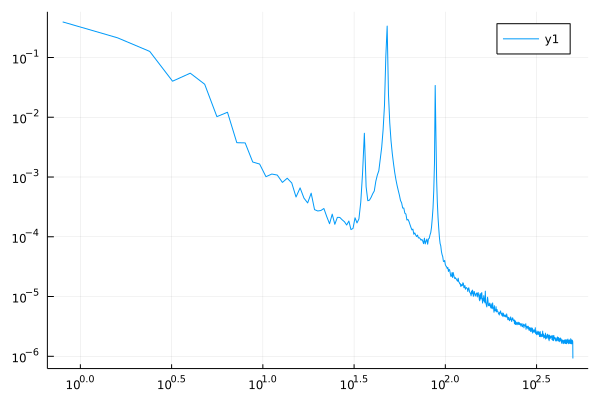

In [21]:
plot(freq(pgram)[2:end], power(pgram)[2:end], xscale=:log10, yscale=:log10)

In [22]:
@. model(x, p) = p[1] * x + p[2]
res = curve_fit(model, log10.(freq(pgram)[2:end]), log10.(power(pgram)[2:end]), [-5/3, 0]);
res.param

2-element Vector{Float64}:
 -2.1696756970890965
 -0.0963321548666653

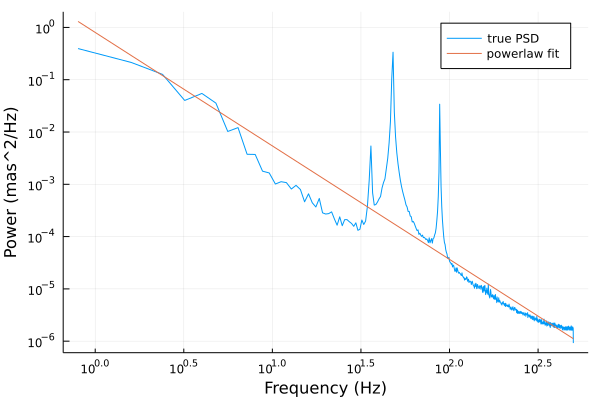

In [23]:
plot(xlabel="Frequency (Hz)", ylabel="Power (mas^2/Hz)")
plot!(freq(pgram)[2:end], power(pgram)[2:end], xscale=:log10, yscale=:log10, label="true PSD")
plot!(freq(pgram)[2:end], 10 .^ model(log10.(freq(pgram)[2:end]), res.param), xscale=:log10, yscale=:log10, label="powerlaw fit")